In [2]:
from keras.utils import to_categorical
from keras_preproccessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np


ModuleNotFoundError: No module named 'keras_preproccessing'

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras_preprocessing'

In [4]:
from keras.utils import to_categorical
from keras_preproccessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras_preproccessing'

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels
        

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\USER\PycharmProjects\Face Emotion Detection\.venv\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [34]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [50]:
from keras.utils import to_categorical

In [51]:
num_classes = 7
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [54]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3), activation='relu' , input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))


In [55]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [61]:
model.fit(x=x_train, y=y_train_one_hot, batch_size=128, epochs=100, validation_data=(x_test, y_test_one_hot))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 928s 4s/step - accuracy: 0.4351 - loss: 1.4676 - val_accuracy: 0.4918 - val_loss: 1.3278
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1316s 6s/step - accuracy: 0.4539 - loss: 1.4136 - val_accuracy: 0.5033 - val_loss: 1.3049
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 915s 4s/step - accuracy: 0.4703 - loss: 1.3736 - val_accuracy: 0.5187 - val_loss: 1.2677
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 7561s 34s/step - accuracy: 0.4873 - loss: 1.3306 - val_accuracy: 0.5385 - val_loss: 1.2220
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 14026s 62s/step - accuracy: 0.5043 - loss: 1.3098 - val_accuracy: 0.5348 - val_loss: 1.2206
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 43316s 192s/step - accuracy: 0.5063 - loss: 1.2869 - val_accuracy: 0.5385 - val_loss: 1.2156
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1417s 6s/step - accuracy: 0.5176 - loss: 1.2675 - val_accuracy: 0.5563 - val_loss: 1.1700
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1153s 5s/step - accuracy: 0.5252 - los

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_13_1/conv2d_43_1/convolution/Conv2DBackpropFilter defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_13_1/conv2d_43_1/convolution/Conv2DBackpropFilter}}]] [Op:__inference_one_step_on_iterator_6043]

In [62]:
model_json = model.to_json()
with open("emotiondetector.json",'w')as json_file:
     json_file.write(model_json)
model.save("emotiondetector.h5")



In [64]:
from keras.models import model_from_json

In [65]:
json_file = open("emotiondetector.json",'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [66]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [82]:
def ef(image):
    image = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [79]:
image = 'images/train/angry/27.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is " , pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
model prediction is  angry


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  angry


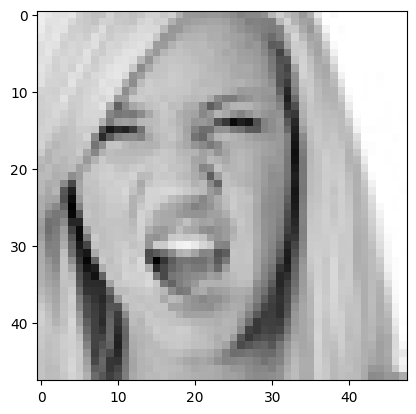

In [85]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is " , pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
model prediction is  angry


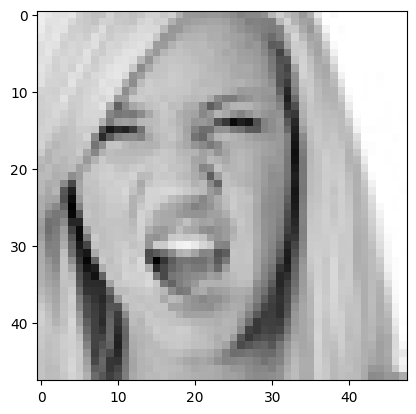

In [87]:
image = 'images/train/happy/7.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is " , pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')